In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

# Jupyter notebook ke liye inline plotting
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Pandas display option
pd.set_option('display.max_columns', None)


In [29]:
from google.colab import files
uploaded = files.upload()




Saving amazon_clean.csv to amazon_clean (1).csv


In [30]:
import pandas as pd

df = pd.read_csv('amazon_clean (1).csv', encoding='utf-8', on_bad_lines='skip')
df.head()


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23/07/2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25/10/2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23/12/2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21/11/2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13/07/2013,513,0,0,0,0,0.0,0.0


In [31]:
# DATA CLEANING;-

# Check columns
print(df.columns)

# Show null values
print(df.isnull().sum())

# Drop rows jahan review text missing hai
df.dropna(subset=['reviewText'], inplace=True)

constraints = ["#FF5733", "#FFC300", "#28B463", "#5DADE2", "#AF7AC5"]



Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [32]:
# Clean Review Text + Extract Polarity using TextBlob.

import re
from textblob import TextBlob

# Clean text function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))  # remove special characters
    text = text.lower()                          # convert to lowercase
    text = re.sub(r'\s+', ' ', text)             # remove extra spaces
    return text.strip()

# Apply cleaning
df['clean_review'] = df['reviewText'].apply(clean_text)

# Add polarity & subjectivity
df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Show sample
df[['reviewText', 'clean_review', 'polarity', 'subjectivity']].head()


,reviewText,clean_review,polarity,subjectivity
0,No issues.,no issues,0.000000,0.0000
1,"Purchased this for my device, it worked as adv...",purchased this for my device it worked as adve...,0.200000,0.2000
2,it works as expected. I should have sprung for...,it works as expected i should have sprung for ...,0.129167,0.5250
3,This think has worked out great.Had a diff. br...,this think has worked out great had a diff bra...,0.212500,0.4875
4,"Bought it with Retail Packaging, arrived legit...",bought it with retail packaging arrived legit ...,0.386667,0.3600


from matplotlib import pyplot as plt
_df_8['polarity'].plot(kind='hist', bins=20, title='polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['subjectivity'].plot(kind='hist', bins=20, title='subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('reviewText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('clean_review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='polarity', y='subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['polarity'].plot(kind='line', figsize=(8, 4), title='polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['subjectivity'].plot(kind='line', figsize=(8, 4), title='subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_review'].value_counts()
    for x_label, grp in _df_15.groupby('reviewText')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviewText')
_ = plt.ylabel('clean_review')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['reviewText'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='polarity', y='reviewText', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['clean_review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='polarity', y='clean_review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['reviewText'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='subjectivity', y='reviewText', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['clean_review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='subjectivity', y='clean_review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [33]:
# Sentiment Classification Using TextBlob Polarity.

# Simple classification from polarity
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['polarity'].apply(get_sentiment)

# Show counts
df['textblob_sentiment'].value_counts()


,count
textblob_sentiment,
Positive,4172
Negative,475
Neutral,267


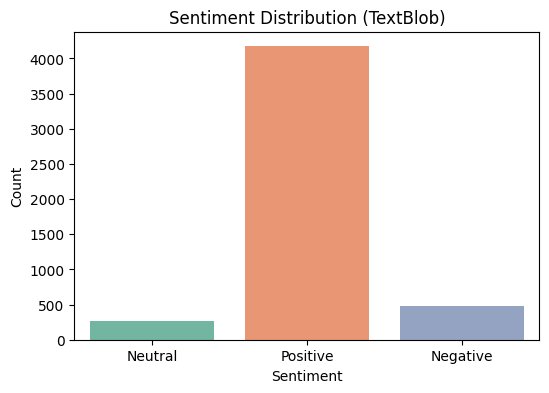

In [34]:
# Visualize Sentiment Distribution.


import seaborn as sns
import matplotlib.pyplot as plt

# Plot count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='textblob_sentiment', palette='Set2')
plt.title("Sentiment Distribution (TextBlob)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [35]:
# (Optional but Powerful) Add VADER Sentiment.

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Vader compound score
df['compound'] = df['clean_review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify using VADER
df['vader_sentiment'] = df['compound'].apply(
    lambda c: 'Positive' if c >= 0.05 else ('Negative' if c <= -0.05 else 'Neutral')
)

df[['clean_review', 'compound', 'vader_sentiment']].head()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,clean_review,compound,vader_sentiment
0,no issues,-0.2960,Negative
1,purchased this for my device it worked as adve...,-0.2960,Negative
2,it works as expected i should have sprung for ...,-0.3089,Negative
3,this think has worked out great had a diff bra...,0.9201,Positive
4,bought it with retail packaging arrived legit ...,0.7087,Positive


from matplotlib import pyplot as plt
_df_1['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('clean_review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('vader_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['vader_sentiment'].value_counts()
    for x_label, grp in _df_5.groupby('clean_review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('clean_review')
_ = plt.ylabel('vader_sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['clean_review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='compound', y='clean_review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['vader_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='compound', y='vader_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

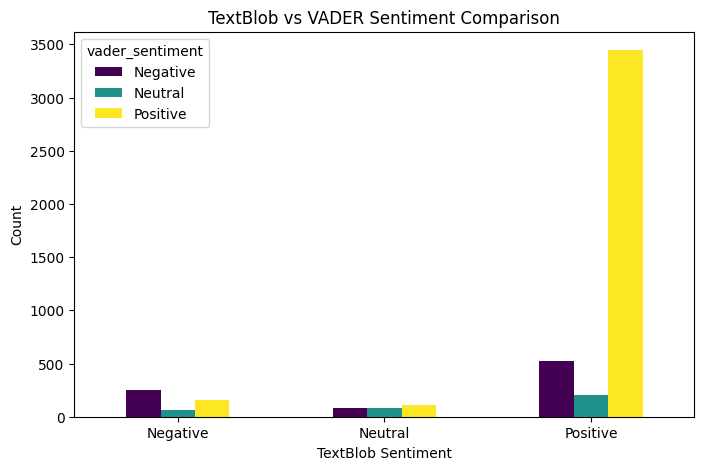

In [36]:
# Compare TextBlob vs VADER (Optional)

# Compare both models
comparison = df[['textblob_sentiment', 'vader_sentiment']].value_counts().unstack().fillna(0)
comparison.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("TextBlob vs VADER Sentiment Comparison")
plt.xlabel("TextBlob Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


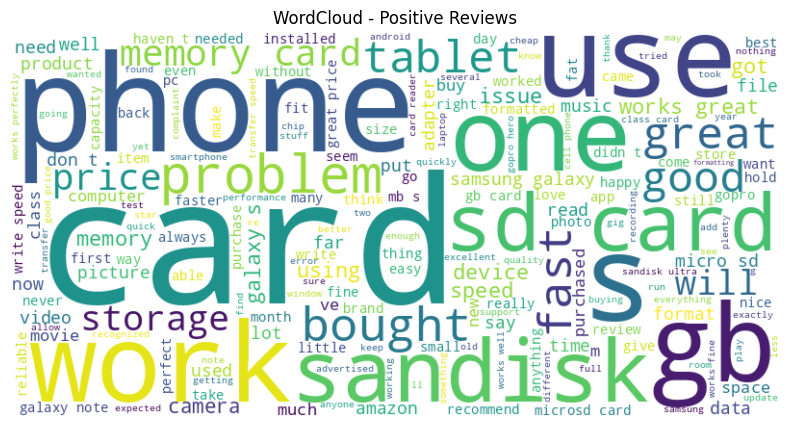

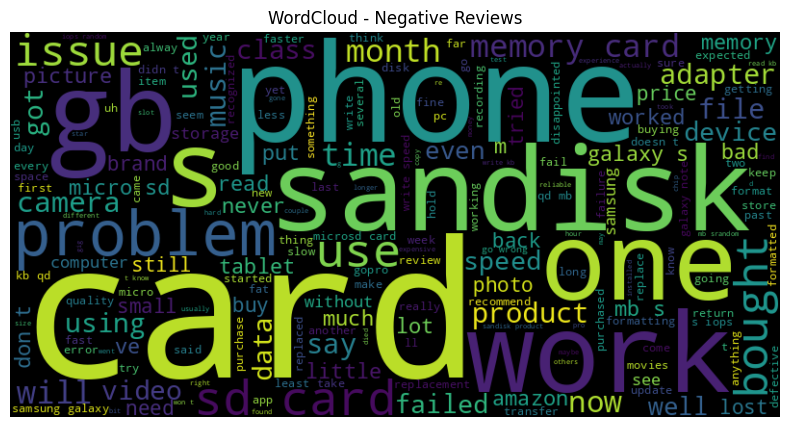

In [38]:
# WordCloud for Positive & Negative Reviews

from wordcloud import WordCloud

# Positive reviews
positive_text = ' '.join(df[df['textblob_sentiment'] == 'Positive']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Reviews')
plt.show()

# Negative reviews
negative_text = ' '.join(df[df['textblob_sentiment'] == 'Negative']['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Reviews')
plt.show()
